**Project Goal:
Analyze factors influencing employee attrition and uncover insights that could help HR reduce employee churn.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition-prediction/HR-Employee-Attrition.csv


**Step 1: Importing Library**

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import warnings 

warnings.filterwarnings('ignore')

**Step 2: Load & Explore Data**

In [4]:
data= pd.read_csv('/kaggle/input/employee-attrition-prediction/HR-Employee-Attrition.csv') 
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
data.head(10) 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Correlation Map**

<Axes: >

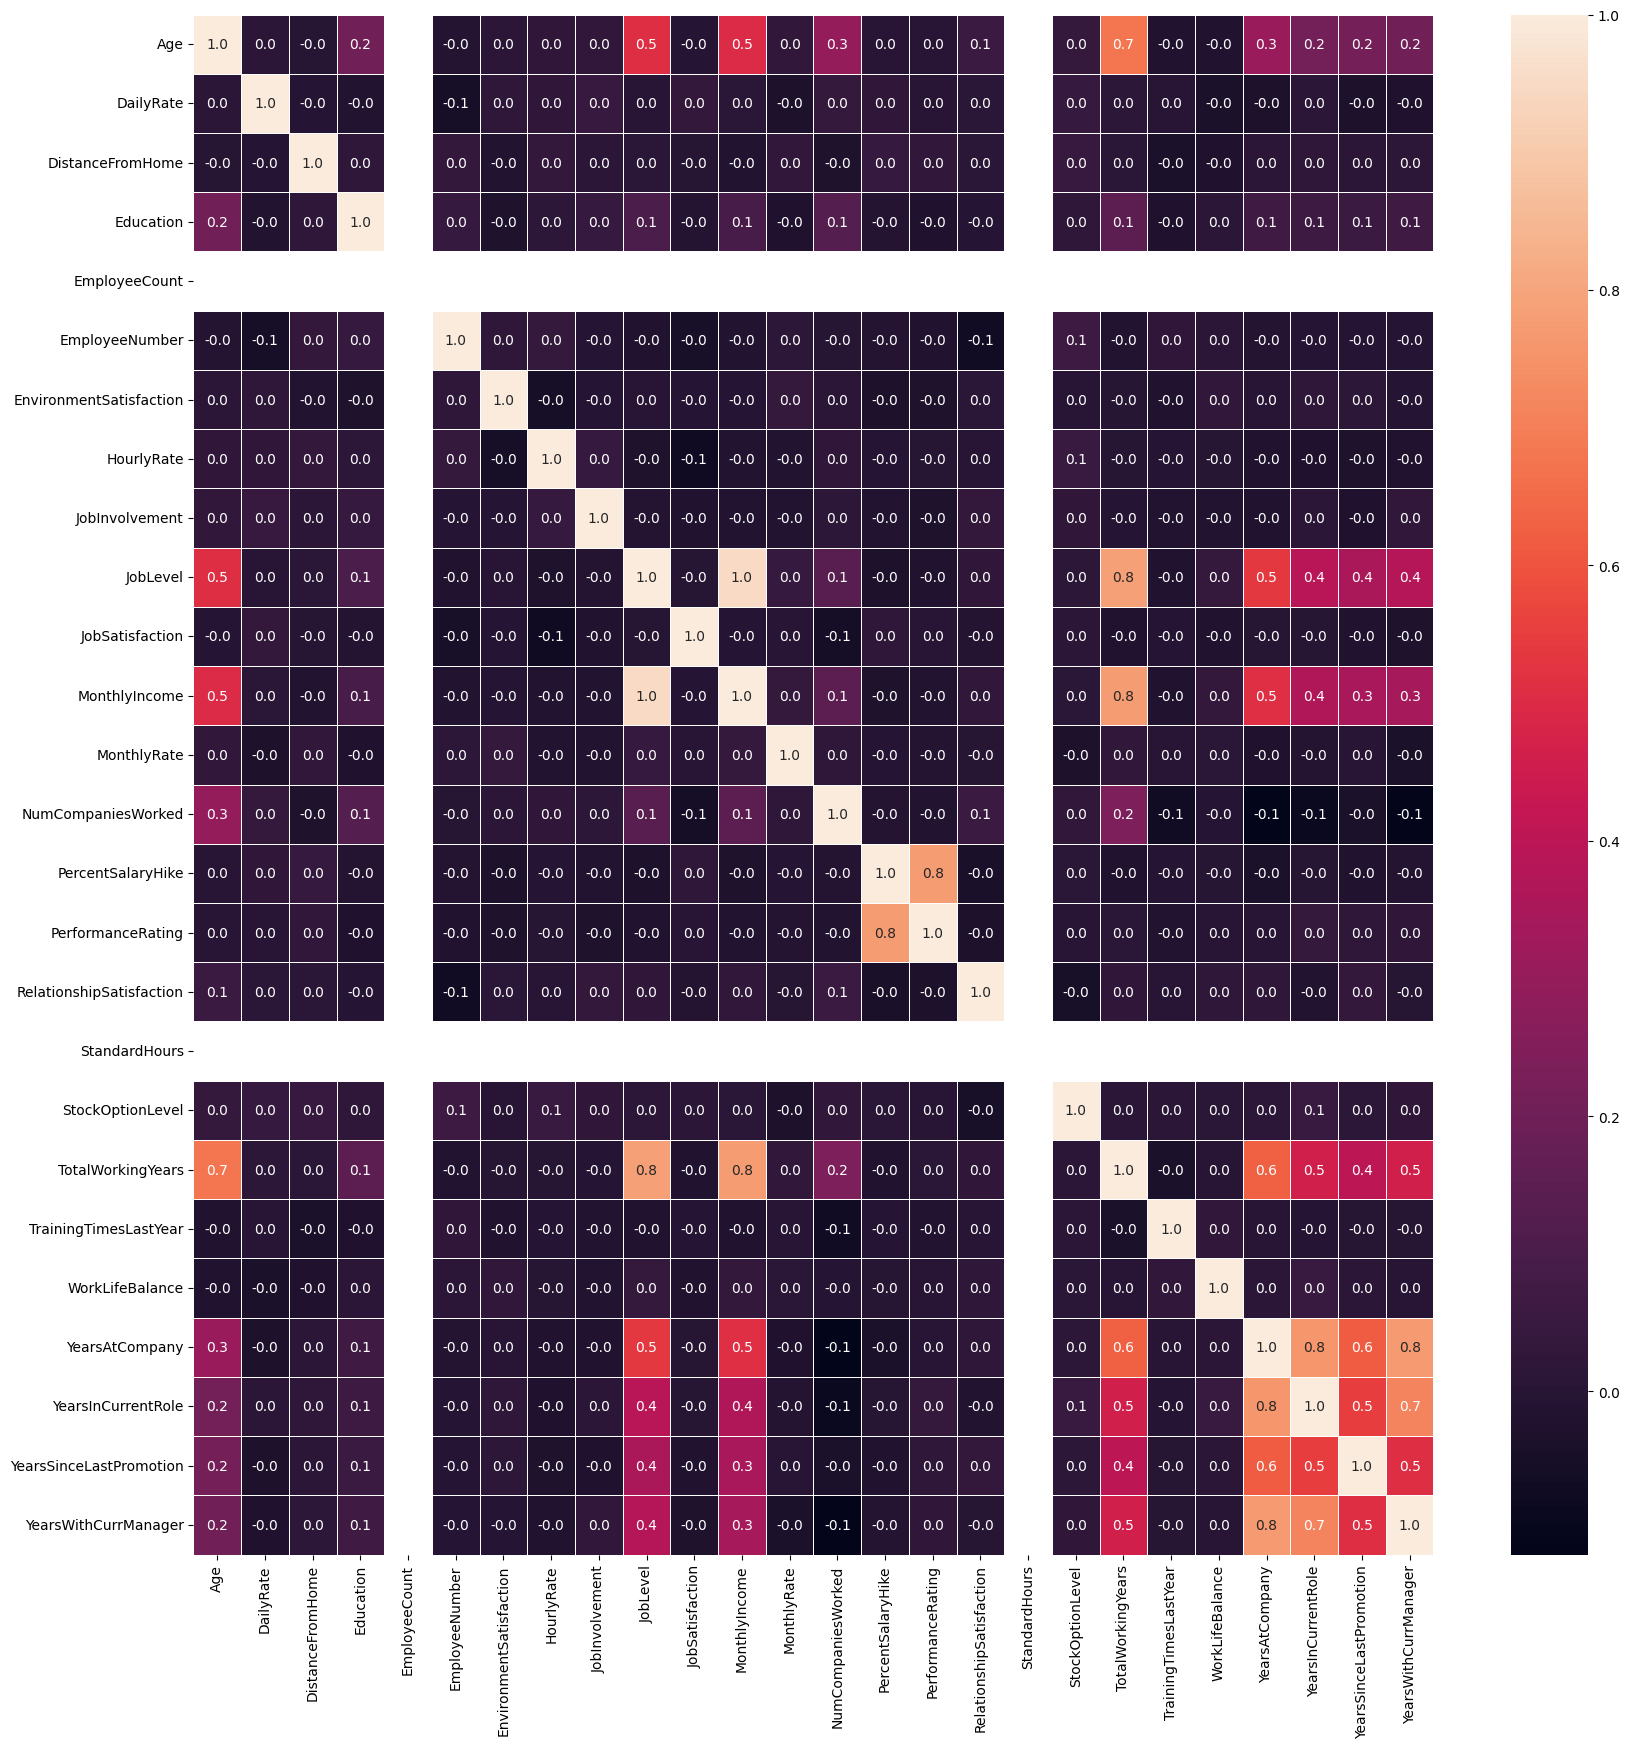

In [9]:
fig, ax= plt.subplots(figsize=(20,20))  
data_corr= data.drop(['Attrition','Department','BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1) 
sns.heatmap(data_corr.corr(),annot=True, linewidths=0.5, fmt='0.1f', ax=ax)

**Step 3: Exploratory Data Analysis (EDA)
Attrition Distribution**

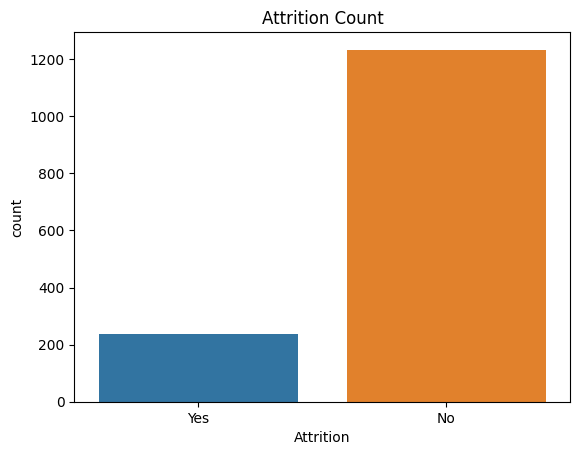

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition count
sns.countplot(x='Attrition', data=data)
plt.title("Attrition Count")
plt.show()


**Step 04 : Countplot Visulization**

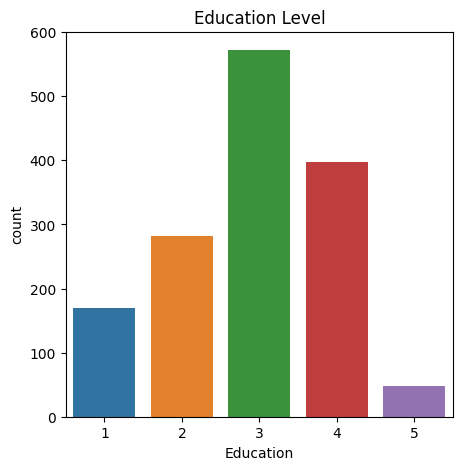

In [11]:
sns.countplot(data=data, x="Education") 
fig= plt.gcf()
fig.set_size_inches(5,5) 
plt.title('Education Level')
plt.show()

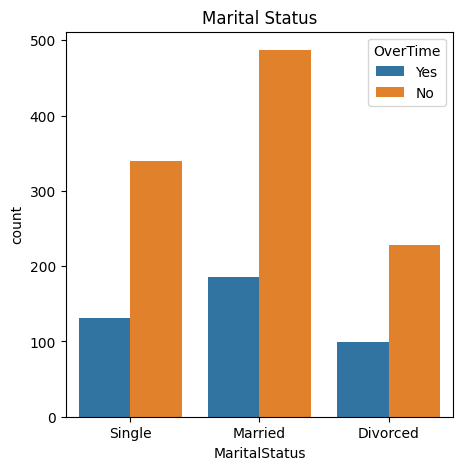

The employee ids of people who are single are as below:



0          1
2          4
5          8
8         12
11        15
        ... 
1454    2046
1455    2048
1460    2054
1463    2057
1464    2060
Name: EmployeeNumber, Length: 470, dtype: int64

In [12]:
sns.countplot(x='MaritalStatus', hue='OverTime', data=data) 
fig= plt.gcf() 
fig.set_size_inches(5,5) 
plt.title('Marital Status')  
plt.show()

#getting the employee ids of the people who are the morottu singles   
morattu_singles= data.loc[data['MaritalStatus'] == 'Single'] 
print("The employee ids of people who are single are as below:\n")
morattu_singles['EmployeeNumber'] 

Text(0.5, 1.0, 'Job Role')

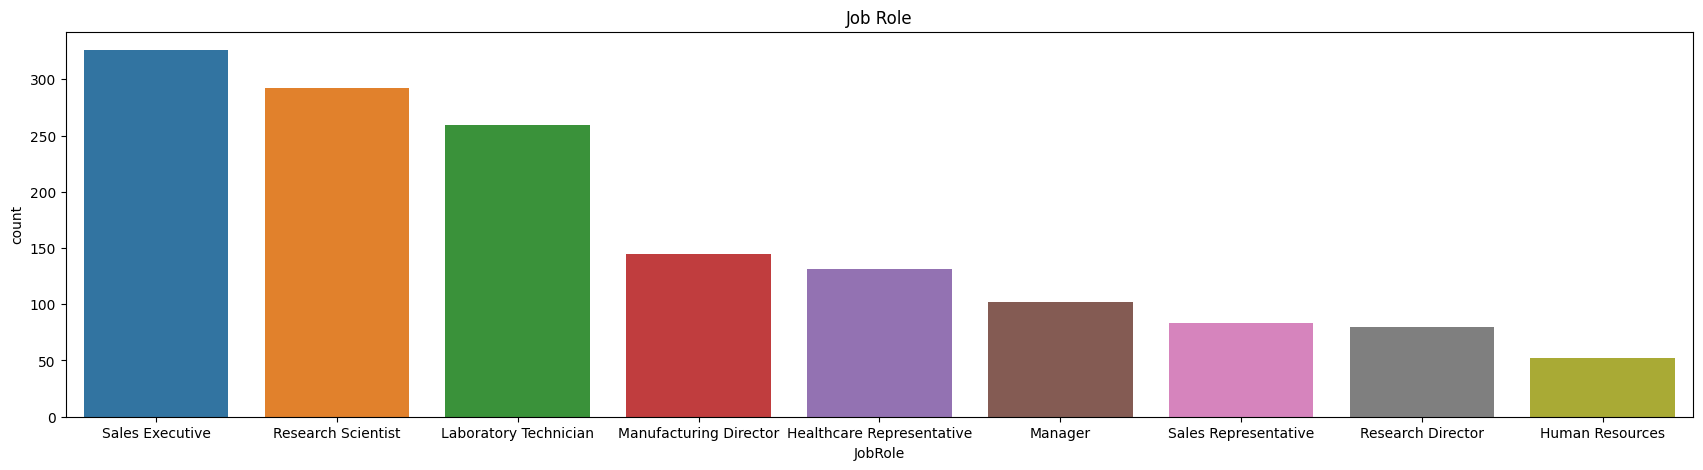

In [13]:
sns.countplot(x= 'JobRole', data=data) 
fig= plt.gcf() 
fig.set_size_inches(21,5) 
plt.title('Job Role')

Text(0.5, 1.0, 'Over Time Comparison wrt Gender')

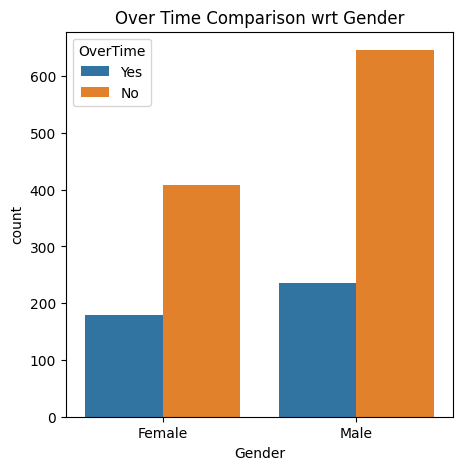

In [14]:
sns.countplot(x='Gender', hue='OverTime' , data=data) 
fig= plt.gcf() 
fig.set_size_inches(5,5) 
plt.title('Over Time Comparison wrt Gender')

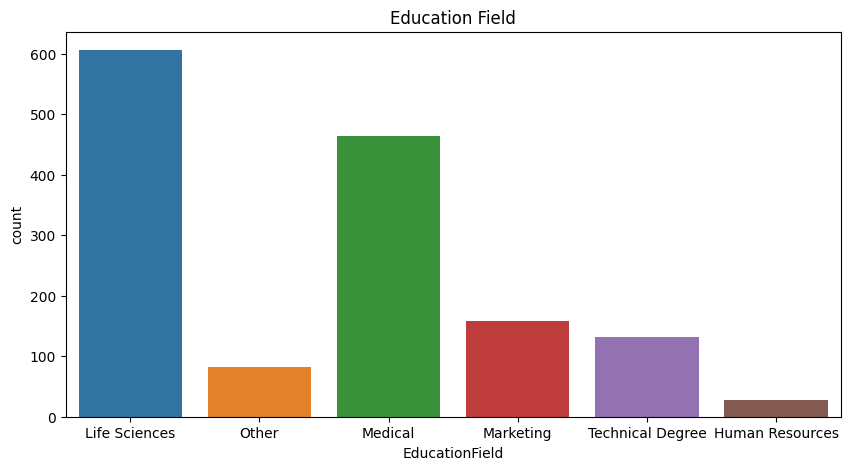

In [15]:
sns.countplot(data=data, x="EducationField") 
fig= plt.gcf()
fig.set_size_inches(10,5) 
plt.title('Education Field')
plt.show()

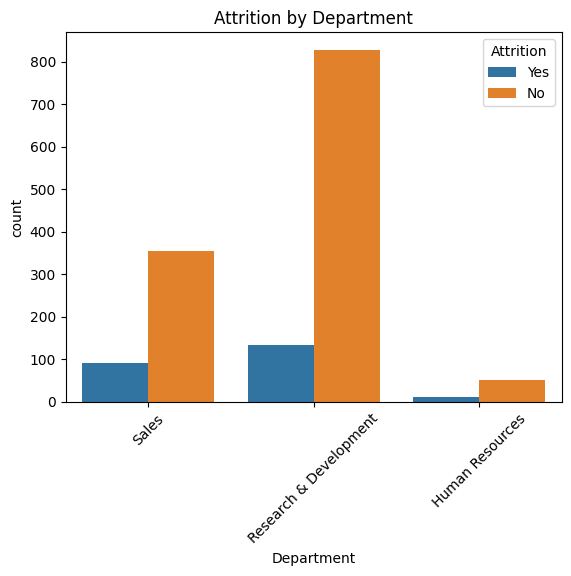

In [24]:
# Department
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()



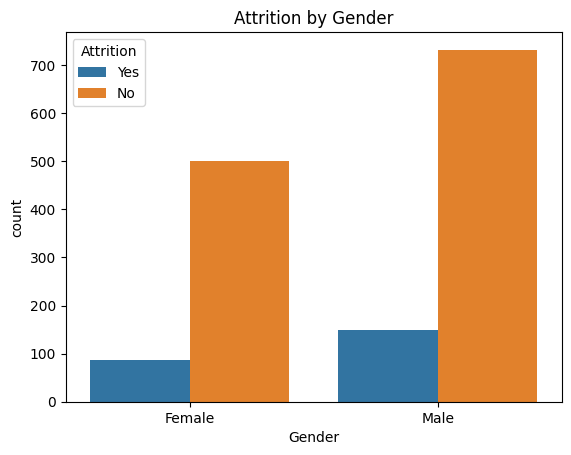

In [25]:
# Gender
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title("Attrition by Gender")
plt.show()




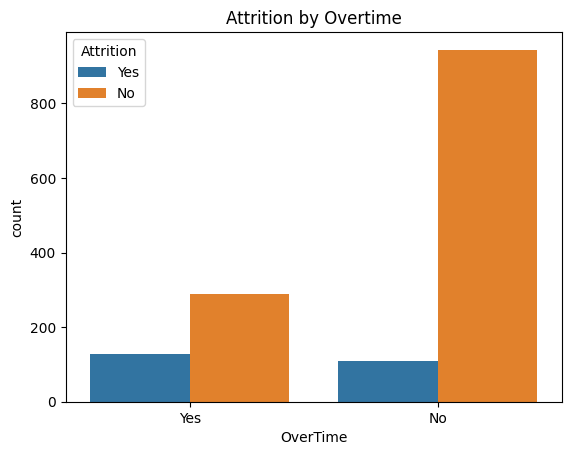

In [26]:
# Overtime
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.title("Attrition by Overtime")
plt.show()

** Step 5: Correlation Analysis**

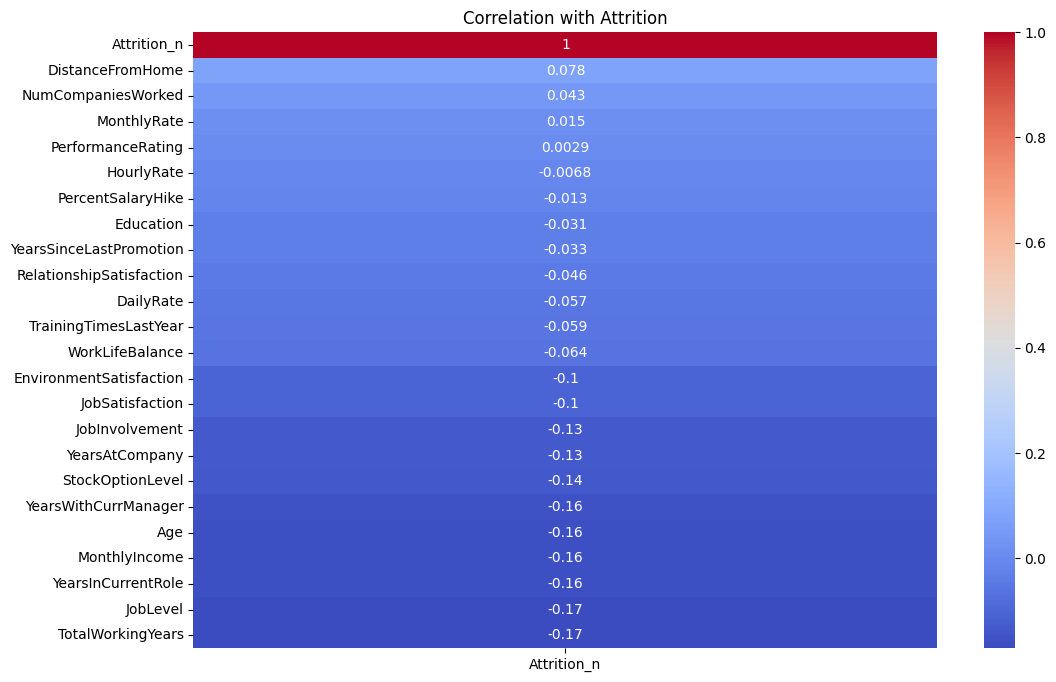

In [30]:
# Encode Attrition as binary
data['Attrition_n'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True)[['Attrition_n']].sort_values('Attrition_n', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Attrition")
plt.show()


** Step 6: Feature Encoding**

In [32]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data.drop('Attrition', axis=1), drop_first=True)


**Overtime workers have higher attrition.**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Attrition' is in binary format for grouped analysis
data['Attrition_n'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Set plot style
sns.set(style="whitegrid")


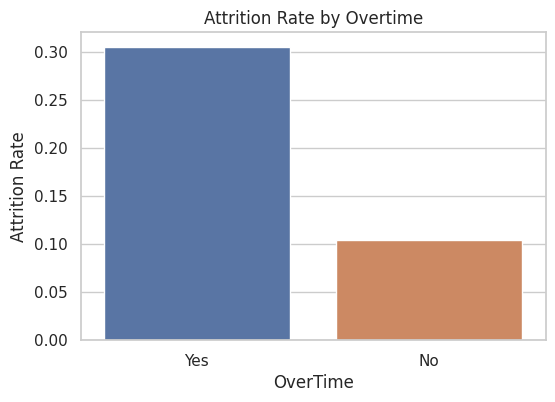

In [36]:
# Insight 1: Overtime vs Attrition
plt.figure(figsize=(6, 4))
sns.barplot(x='OverTime', y='Attrition_n', data=data, ci=None)
plt.title("Attrition Rate by Overtime")
plt.ylabel("Attrition Rate")
plt.show()

**Certain departments or job roles show more churn.**

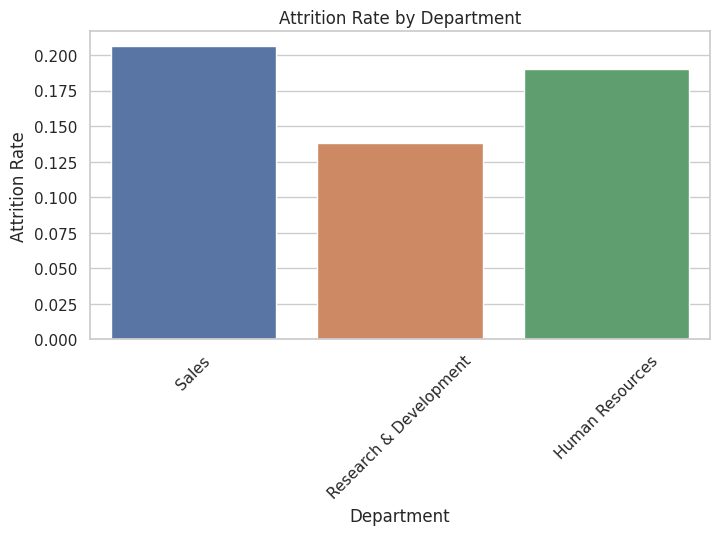

In [37]:
# Insight 2: Department vs Attrition
plt.figure(figsize=(8, 4))
sns.barplot(x='Department', y='Attrition_n', data=data, ci=None)
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

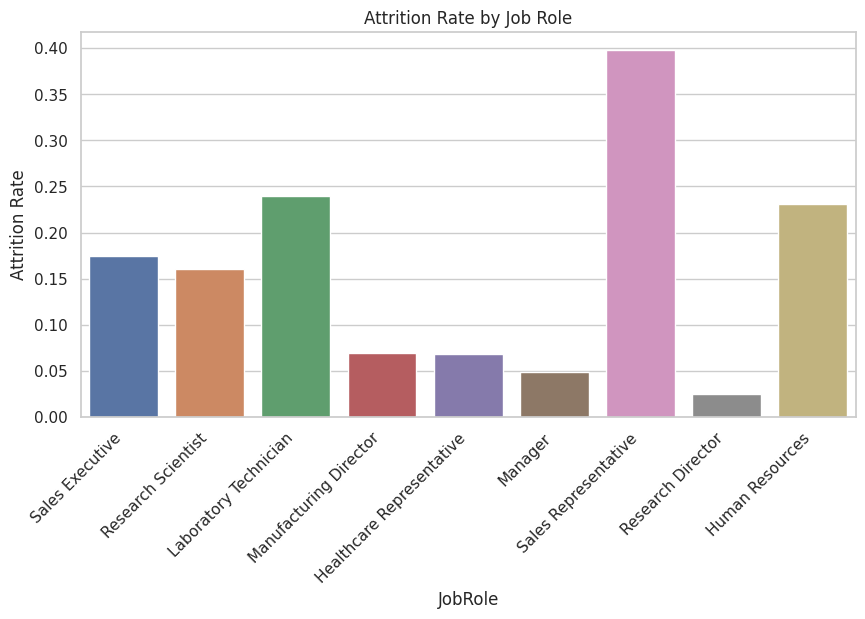

In [38]:
# Insight 2 (continued): Job Role vs Attrition
plt.figure(figsize=(10, 5))
sns.barplot(x='JobRole', y='Attrition_n', data=data, ci=None)
plt.title("Attrition Rate by Job Role")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45, ha='right')
plt.show()

**Monthly income and job satisfaction impact attrition.**

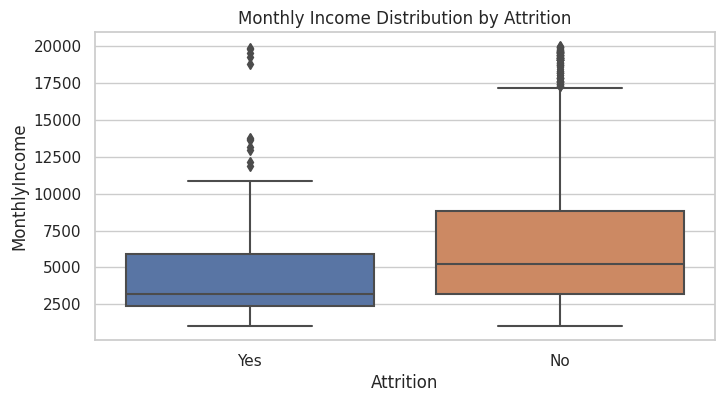

In [39]:
# Insight 3: Monthly Income vs Attrition
plt.figure(figsize=(8, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title("Monthly Income Distribution by Attrition")
plt.show()

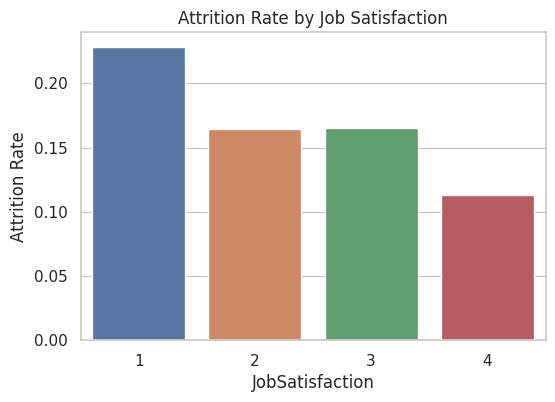

In [40]:
# Insight 3 (continued): Job Satisfaction vs Attrition
plt.figure(figsize=(6, 4))
sns.barplot(x='JobSatisfaction', y='Attrition_n', data=data, ci=None)
plt.title("Attrition Rate by Job Satisfaction")
plt.ylabel("Attrition Rate")
plt.show()